In [178]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import mltools as ml
import math
import csv

In [179]:
from numpy import asarray as arr
from numpy import asmatrix as mat
from numpy import atleast_2d as twod
from itertools import islice
import seaborn as sns

### Load data

In [180]:
data_train = pd.read_csv('training_preprocessed.csv',delimiter=',',skipinitialspace=True)
data_test = pd.read_csv('test_preprocessed.csv',delimiter=',',skipinitialspace=True)

In [181]:
data_train = data_train.drop(columns=['Unnamed: 0'])
data_test = data_test.drop(columns=['Unnamed: 0'])

In [182]:
keys = data_train.keys()
data_cols = keys.drop('salary')
label_col = 'salary'
X_test = data_test[data_cols]
y_test = data_test[label_col]

### Training and validation split

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_val, y_train, y_val = train_test_split(data_train[data_cols], data_train[label_col], 
                                                  test_size=0.2, random_state=42)

### Random Forest (temporaly test one)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [9]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=50)

In [10]:
rf_clf.fit(X_train, y_train)
rf_clf.score(X_train, y_train)
rf_clf.score(X_test, y_test)
y_pred = rf_clf.predict(data_test[data_cols])

In [194]:
from sklearn.metrics import classification_report, confusion_matrix
# cf_matrix = confusion_matrix(data_test[label_col],y_pred)

### Test the Error Rates versus maxDepth

[[11298,1137]
 [1786,2060]]

Text(0.5, 1.0, 'Error Rates versus maxDepth')

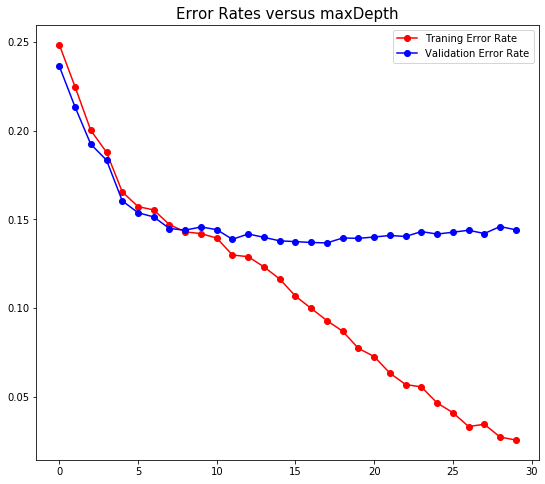

In [12]:
n = 30
Train_err_lst = np.zeros(len(range(0,n)))
Vladi_err_lst = np.zeros(len(range(0,n)))
for i in range(len(range(0,n))):
    rf_clf = RandomForestClassifier(n_estimators=20,max_depth=i+1)
    rf_clf.fit(X_train, y_train)
    Train_err_lst[i]= 1 - rf_clf.score(X_train, y_train)
    Vladi_err_lst[i]= 1 - rf_clf.score(X_test, y_test)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(0,n),Train_err_lst,'ro-')
ax.plot(range(0,n),Vladi_err_lst,'bo-')
ax.legend(["Traning Error Rate","Validation Error Rate"])
ax.set_title("Error Rates versus maxDepth",fontsize=15)

In [13]:
print('Best validation score is achieved when maxDepth is {}'.format(np.argmin(Vladi_err_lst)))

Best validation score is achieved when maxDepth is 17


In [14]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(rf_clf, X_train, y_train, cv=10)

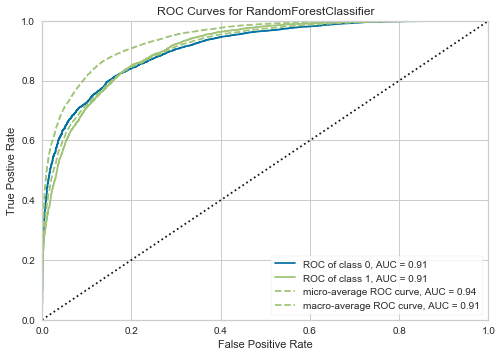

In [36]:
from yellowbrick.classifier import ROCAUC
classes = ["0", "1"]
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=np.argmin(Vladi_err_lst))
rf_clf.fit(X_train, y_train)
visualizer = ROCAUC(rf_clf, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   

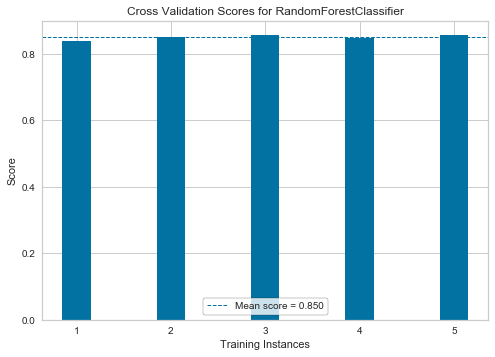

In [37]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5, random_state=42)
# Instantiate the classification model and visualizer
visualizer = CVScores(rf_clf,cv=cv, scoring='f1_weighted')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

[[<matplotlib.axis.YTick at 0x1ae03d1d5c8>,

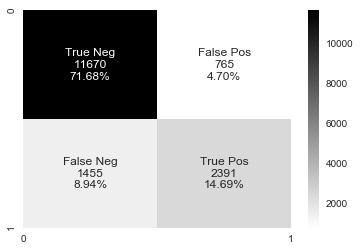

In [38]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')
ax.set(yticks=[0, 2], 
       xticks=[0, 2])

### Test the Error Rates versus Minileaf

Text(0.5, 1.0, 'Error Rates versus Minin Leaf')

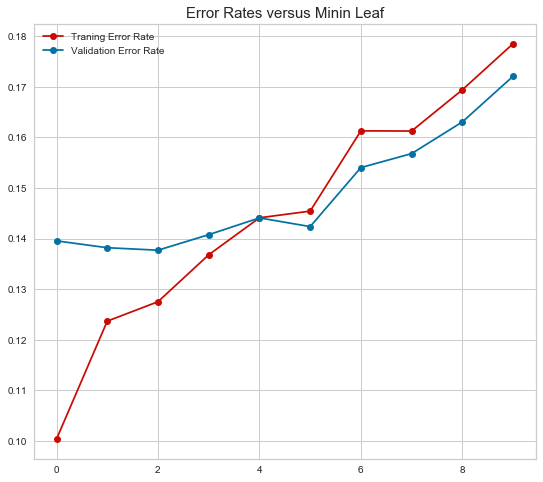

In [71]:
n = 10
Train_err_lst = np.zeros(len(range(0,n)))
Vladi_err_lst = np.zeros(len(range(0,n)))
for i in range(len(range(0,n))):
    rf_clf = RandomForestClassifier(n_estimators=20,max_depth=17,min_samples_leaf=2**i)
    rf_clf.fit(X_train, y_train)
    Train_err_lst[i]= 1 - rf_clf.score(X_train, y_train)
    Vladi_err_lst[i]= 1 - rf_clf.score(X_test, y_test)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(1,n+1),Train_err_lst,'ro-')
ax.plot(range(1,n+1),Vladi_err_lst,'bo-')
ax.legend(["Traning Error Rate","Validation Error Rate"])
ax.set_title("Error Rates versus Minin Leaf",fontsize=15)

Text(0.5, 1.0, 'Error Rates versus Minin Parent')

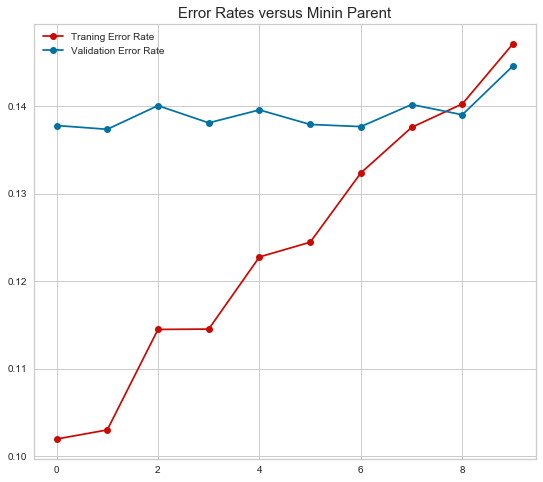

In [70]:
n = 10
Train_err_lst = np.zeros(len(range(0,n)))
Vladi_err_lst = np.zeros(len(range(0,n)))
for i in range(len(range(0,n))):
    rf_clf = RandomForestClassifier(n_estimators=20,max_depth=17,min_samples_split=np.int(2**i)+1)
    rf_clf.fit(X_train, y_train)
    Train_err_lst[i]= 1 - rf_clf.score(X_train, y_train)
    Vladi_err_lst[i]= 1 - rf_clf.score(X_test, y_test)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.plot(range(1,n+1),Train_err_lst,'ro-')
ax.plot(range(1,n+1),Vladi_err_lst,'bo-')
ax.legend(["Traning Error Rate","Validation Error Rate"])
ax.set_title("Error Rates versus Minin Parent",fontsize=15)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=17,min_samples_leaf=3,
                                    min_samples_split=2)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_train, y_train)
rf_clf.score(X_test, y_test)


### SVM

In [18]:
#from sklearn import svm

In [19]:
#svm_clf = svm.SVC(tol=0.1, degree=2)

In [20]:
#svm_clf.fit(data_train[train_cols], data_train[train_keys])

In [21]:
#svm_clf.score(data_train[train_cols], data_train[train_keys])

In [22]:
#svm_clf.score(data_test[train_cols], data_test[train_keys])

### Neural Network

In [23]:
from sklearn import neural_network

In [24]:
mlp_clf = neural_network.MLPClassifier(hidden_layer_sizes=(1))

In [25]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
mlp_clf.score(X_train, y_train)

0.7932661548304543

In [27]:
mlp_clf.score(X_val, y_val)

0.7905005597313289

In [28]:
y_pred = mlp_clf.predict(data_test[data_cols])
cf_matrix = confusion_matrix(data_test[label_col],y_pred)

[[<matplotlib.axis.YTick at 0x1ae09e056c8>,

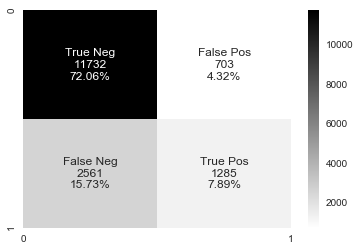

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = mlp_clf.predict(data_test[data_cols])
cf_matrix = confusion_matrix(data_test[label_col],y_pred)
fig,ax = plt.subplots(1,1,figsize=(6,4))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')
ax.set(yticks=[0, 2], 
       xticks=[0, 2])

### AdaBoost

In [185]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [169]:
X_train.keys()[1:20]

Index(['fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters'],
      dtype='object')

In [186]:
import copy
X_train_backup = copy.copy(X_train)
X_test_backup  = copy.copy(X_test)

In [187]:
X_train = copy.copy(X_train_backup)
X_test = copy.copy(X_test_backup)

In [188]:
X_train = X_train.drop(columns=['hours-per-week','race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Holand-Netherlands',
       'native-country_Honduras', 'native-country_Hong',
       'native-country_Hungary', 'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'])
X_test = X_test.drop(columns=['hours-per-week','race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Holand-Netherlands',
       'native-country_Honduras', 'native-country_Hong',
       'native-country_Hungary', 'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'])

In [218]:
AB_clf = AdaBoostClassifier(n_estimators=731)
AB_clf.fit(X_train, y_train)
Y = AB_clf.staged_score(X_test,y_test)

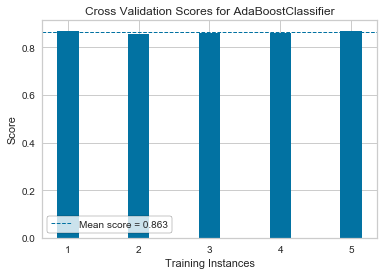

In [226]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5, random_state=42)
# Instantiate the classification model and visualizer
visualizer = CVScores(AB_clf,cv=cv, scoring='f1_weighted')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()    

In [219]:
from sklearn.metrics import zero_one_loss

In [220]:
ada_discrete_err = np.zeros((731,))
for i, y_pred in enumerate(AB_clf.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

Text(0.5, 1.0, 'Error Rate verse Estimater Number')

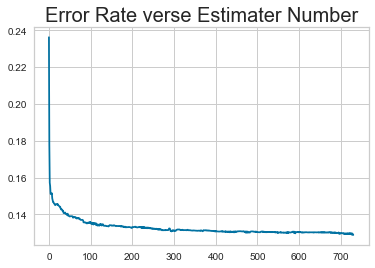

In [221]:
plt.plot(ada_discrete_err)
plt.title('Error Rate verse Estimater Number',fontsize=20)

In [222]:
print('Best validation score {} is achieved when Number of Estimator is {}'.format(1-ada_discrete_err[np.argmin(ada_discrete_err)],np.argmin(ada_discrete_err)))

Best validation score 0.871199557766722 is achieved when Number of Estimator is 730


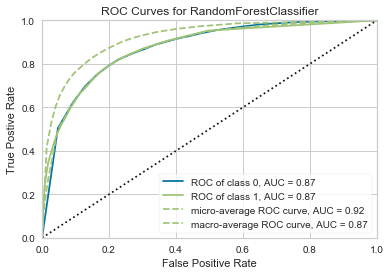

In [223]:
from yellowbrick.classifier import ROCAUC
classes = ["0", "1"]
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=np.argmin(Vladi_err_lst))
rf_clf.fit(X_train, y_train)
visualizer = ROCAUC(rf_clf, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

[[<matplotlib.axis.YTick at 0x1ae09f44d08>,

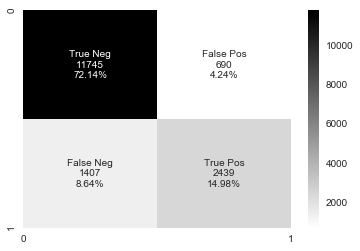

In [224]:
y_pred = AB_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
fig,ax = plt.subplots(1,1,figsize=(6,4))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')
ax.set(yticks=[0, 2], 
       xticks=[0, 2])

In [225]:
AB_clf.score(X_test, y_test)

0.871199557766722